# Assignment 4 

## Team 17 - Shashank Siripragada, Sumit Patil

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### This csv file contains stocks from Apple, Tesla, Microsoft and Facebook

In [167]:
data = pd.read_csv('data/stock_data.csv', index_col=['Date'], parse_dates=['Date'])

In [168]:
data.Stock.unique()

array(['AAPL', 'TSLA', 'MSFT', 'FB'], dtype=object)

In [169]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Stock'], dtype='object')

#### Let's assign each stock values to the respective dataframes and look at the shapes, stock begin and end dates

In [170]:
data_aapl = data[data.Stock == 'AAPL']
data_msft = data[data.Stock == 'MSFT']
data_fb = data[data.Stock == 'FB']
data_tsla = data[data.Stock == 'TSLA']
 
print('Apple:', data_aapl.shape, 'Begin:', data_aapl.index[0].strftime('%m/%d/%Y'), 'End:', data_aapl.index[-1].strftime('%m/%d/%Y'), '\n')
print('Microsoft:', data_msft.shape, 'Begin:', data_msft.index[0].strftime('%m/%d/%Y'), 'End:', data_msft.index[-1].strftime('%m/%d/%Y'), '\n')
print('facebook:', data_fb.shape, 'Begin:', data_fb.index[0].strftime('%m/%d/%Y'), 'End:', data_fb.index[-1].strftime('%m/%d/%Y'),  '\n')
print('Tesla:', data_tsla.shape, 'Begin:', data_tsla.index[0].strftime('%m/%d/%Y'), 'End:', data_tsla.index[-1].strftime('%m/%d/%Y'), '\n')

Apple: (8364, 6) Begin: 09/07/1984 End: 11/10/2017 

Microsoft: (7983, 6) Begin: 03/13/1986 End: 11/10/2017 

facebook: (1381, 6) Begin: 05/18/2012 End: 11/10/2017 

Tesla: (1858, 6) Begin: 06/28/2010 End: 11/10/2017 



#### Plot closing values of each stock vs. date

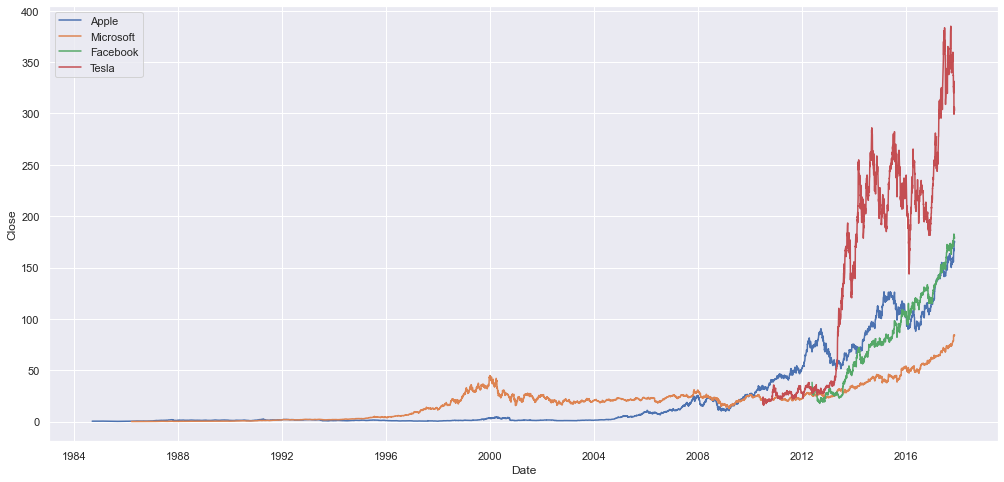

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

aapl_close = data_aapl['Close']
msft_close = data_msft['Close']
fb_close = data_fb['Close']
tsla_close = data_tsla['Close']

plt.figure(figsize=(17, 8))

plt.plot(aapl_close, label='Apple')
plt.plot(msft_close,label='Microsoft')
plt.plot(fb_close,label='Facebook')
plt.plot(tsla_close, label='Tesla')

plt.xlabel("Date")
plt.ylabel("Close")


plt.legend()
plt.show()

#### Let's reset the date based index to number index

In [152]:
data_aapl.reset_index(drop=True, inplace=True)
data_msft.reset_index(drop=True, inplace=True)
data_fb.reset_index(drop=True, inplace=True)
data_tsla.reset_index(drop=True, inplace=True)

#### Now for the modelling part, lets first begin with predicting stock value for the next day. The variable ndays controls the number of days in the future we want to predict the stock prize.

In [153]:
ndays = 1

#### Here we are dropping the column Stock as it just contains string referring to which stock the values belong to. We also drop the the column containing the close values of the stock.

In [154]:
data_aapl.drop(['Stock'], axis = 1, inplace = True)
data_msft.drop(['Stock'], axis = 1, inplace = True)
data_fb.drop(['Stock'], axis = 1, inplace = True)
data_tsla.drop(['Stock'], axis = 1, inplace = True)

data_aapl_final =  data_aapl.drop(['Close'], axis = 1)
data_msft_final = data_msft.drop(['Close'], axis = 1)
data_fb_final = data_fb.drop(['Close'], axis = 1)
data_tsla_final = data_tsla.drop(['Close'], axis = 1)

In [155]:
X = data_aapl_final.iloc[0:-ndays]
y = data_aapl.Close.shift(-ndays).dropna()

print(X.shape, y.shape)

(8363, 4) (8363,)


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [157]:
# Let's keep aside last 10 days of X, y
# X_tr = X.iloc[start:(end-ndays),:]
# X_tst = X.iloc[-ndays:,:]
# y_tr = y.iloc[start:(end-ndays)]
# y_tst = y.iloc[-ndays:]
# print(X_tr.shape, X_tst.shape, y_tr.shape, y_tst.shape)

In [158]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [159]:
rf_model.score(X_train, y_train)

0.9999447389981355

In [160]:
rf_model.score(X_test, y_test)

0.9995172045110818

In [161]:
y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()

#### The plot of predicted values of y vs. actual values of y 

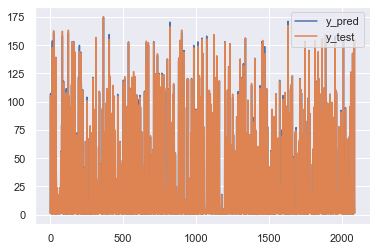

In [162]:
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_test')

plt.legend()
plt.show()

#### Let's increase the value of shift so that we can see how many days into the furtue we can predict with accuracy >= 70%

In [163]:
ndays_aapl = 2550
ndays_msft = 1000
ndays_fb = 1100
ndays_tsla = 1050

### Apple

Test score 0.7326804558768029 

Important Features
 [('Open', 0.6082302454643975), ('Low', 0.1673638668054789), ('Volume', 0.13316175069951458), ('High', 0.09124413703060914)]


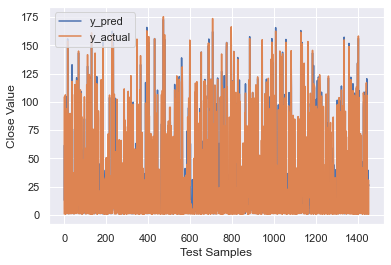

In [164]:
y = data_aapl.Close.shift(-ndays_aapl).dropna()
X = data_aapl_final.iloc[0:-ndays_aapl]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print('Test score', rf_model.score(X_test, y_test), '\n')

print("Important Features\n", sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True))

y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_actual')
plt.xlabel("Test Samples")
plt.ylabel("Close Value")

plt.legend()
plt.show()

### Microsoft

Test score 0.7101045666399536 

Important Features
 [('Open', 0.528832227648945), ('High', 0.18754333147610885), ('Low', 0.14444833974635213), ('Volume', 0.13917610112859413)]


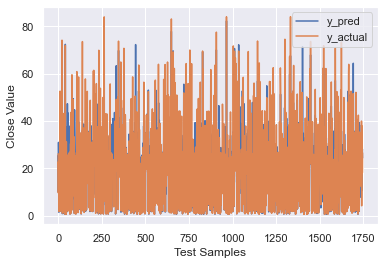

In [165]:
y = data_msft.Close.shift(-ndays_msft).dropna()
X = data_msft_final.iloc[0:-ndays_msft]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print('Test score', rf_model.score(X_test, y_test), '\n')

print("Important Features\n", sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True))

y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_actual')
plt.xlabel("Test Samples")
plt.ylabel("Close Value")

plt.legend()
plt.show()

### Facebook

Test score 0.6937644001848415 

Important Features
 [('Low', 0.34267059597264155), ('High', 0.30754078162581083), ('Volume', 0.21805290969293958), ('Open', 0.1317357127086081)]


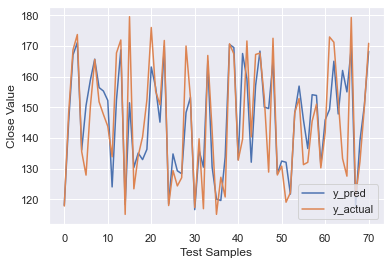

In [106]:
y = data_fb.Close.shift(-ndays_fb).dropna()
X = data_fb_final.iloc[0:-ndays_fb]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print('Test score', rf_model.score(X_test, y_test), '\n')

print("Important Features\n", sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True))

y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_actual')
plt.xlabel("Test Samples")
plt.ylabel("Close Value")

plt.legend()
plt.show()

### Tesla

Test score 0.7289785678038551 

Important Features
 [('Low', 0.3781357359877665), ('Open', 0.27511322136603983), ('High', 0.2696502510201754), ('Volume', 0.07710079162601828)]


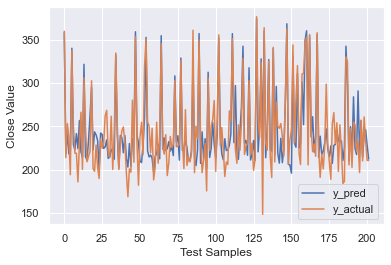

In [107]:
y = data_tsla.Close.shift(-ndays_tsla).dropna()
X = data_tsla_final.iloc[0:-ndays_tsla]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print('Test score', rf_model.score(X_test, y_test), '\n')

print("Important Features\n", sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True))

y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_actual')
plt.xlabel("Test Samples")
plt.ylabel("Close Value")

plt.legend()
plt.show()